In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [2]:
df_train = pd.read_csv('train_data_features_clean.csv')
df_train.drop(columns = ['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], inplace = True)
df_test = pd.read_csv('test_data_features_clean.csv')
df_test.drop(columns = ['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], inplace = True)

In [3]:
df_train.drop(columns = ['Participant', 'IRange_start', 'IRange_end'], inplace = True)
df_test.drop(columns = ['Participant', 'IRange_start', 'IRange_end'], inplace = True)

In [4]:
X_train = df_train.drop(columns = ['Activity']).to_numpy()
y_train = df_train['Activity'].copy().values
X_test = df_test.drop(columns = ['Activity']).to_numpy()
y_test = df_test['Activity'].copy().values

In [5]:
scaler = StandardScaler(copy = False)

In [6]:
scaler.fit_transform(X_train)
scaler.fit_transform(X_test)

array([[ 0.38063676, -0.26981906, -0.05137572, ..., -0.22638954,
        -0.3608573 ,  0.85324066],
       [-0.32451855,  0.35903373, -0.08606522, ...,  0.4099376 ,
        -1.73006981,  0.10979035],
       [-0.4539826 , -0.43023939, -0.17436007, ...,  1.44066235,
         0.08923576,  0.80289601],
       ...,
       [-0.33391494, -0.40742493, -0.27583858, ...,  0.38287934,
         0.15503299, -1.71841237],
       [-0.40677594,  0.06750741, -0.20907562, ..., -0.12292554,
        -0.03052264,  1.06188105],
       [-0.44856647, -0.03407217, -0.22244825, ..., -0.27499323,
         0.6544364 , -1.61366741]])

In [7]:
l1_ratios = [x/5 for x in range(0, 6)]
C_values = [0.2, 0.5, 1, 2, 5]
grid_cv = GridSearchCV(
    LogisticRegression(penalty = 'elasticnet', max_iter = 30, random_state = 1913, solver = 'saga'),
    param_grid = {'l1_ratio': l1_ratios, 'C': C_values},
    scoring = 'neg_log_loss',
    cv = 4)

In [8]:
#grid_cv.fit(X_train, y_train)

In [9]:
#pd.DataFrame(grid_cv.cv_results_)

In [10]:
'''
reg = LogisticRegression(penalty = 'elasticnet', C = 1, l1_ratio = 0.8, max_iter = 100, random_state = 1913, solver = 'saga')
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred_prob = reg.predict_proba(X_test)
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('log loss:', log_loss(y_test, y_pred_prob))
result_matrix = confusion_matrix(y_test, y_pred, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix = result_matrix, display_labels = reg.classes_)
disp.plot()
plt.show()
'''

"\nreg = LogisticRegression(penalty = 'elasticnet', C = 1, l1_ratio = 0.8, max_iter = 100, random_state = 1913, solver = 'saga')\nreg.fit(X_train, y_train)\ny_pred = reg.predict(X_test)\ny_pred_prob = reg.predict_proba(X_test)\nprint('Accuracy score:', accuracy_score(y_test, y_pred))\nprint('log loss:', log_loss(y_test, y_pred_prob))\nresult_matrix = confusion_matrix(y_test, y_pred, normalize = 'true')\ndisp = ConfusionMatrixDisplay(confusion_matrix = result_matrix, display_labels = reg.classes_)\ndisp.plot()\nplt.show()\n"

In [11]:
'''
reg = LogisticRegression(penalty = 'elasticnet', C = 1, l1_ratio = 0.8, max_iter = 300, random_state = 1913, solver = 'saga')
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred_prob = reg.predict_proba(X_test)
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('log loss:', log_loss(y_test, y_pred_prob))
result_matrix = confusion_matrix(y_test, y_pred, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix = result_matrix, display_labels = reg.classes_)
disp.plot()
plt.show()
'''

"\nreg = LogisticRegression(penalty = 'elasticnet', C = 1, l1_ratio = 0.8, max_iter = 300, random_state = 1913, solver = 'saga')\nreg.fit(X_train, y_train)\ny_pred = reg.predict(X_test)\ny_pred_prob = reg.predict_proba(X_test)\nprint('Accuracy score:', accuracy_score(y_test, y_pred))\nprint('log loss:', log_loss(y_test, y_pred_prob))\nresult_matrix = confusion_matrix(y_test, y_pred, normalize = 'true')\ndisp = ConfusionMatrixDisplay(confusion_matrix = result_matrix, display_labels = reg.classes_)\ndisp.plot()\nplt.show()\n"

C:\Users\larse\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy score: 0.9633204633204633
log loss: 0.1262026001887435


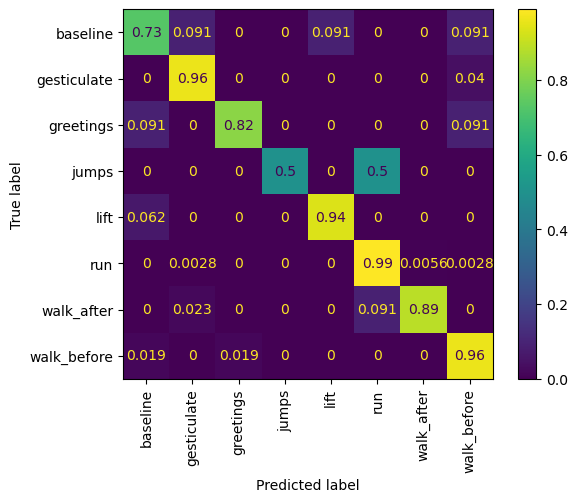

In [12]:
reg = LogisticRegression(penalty = 'elasticnet', C = 1, l1_ratio = 0.8, max_iter = 800, random_state = 1913, solver = 'saga')
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred_prob = reg.predict_proba(X_test)
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('log loss:', log_loss(y_test, y_pred_prob))
result_matrix = confusion_matrix(y_test, y_pred, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix = result_matrix, display_labels = reg.classes_)
disp.plot()
plt.xticks(rotation = 90)
plt.show()

In [13]:
features_names = df_train.columns[1:]
features_totsize = [sum([abs(class_coefs[i]) for class_coefs in reg.coef_]) for i in range(0, len(features_names))]
importances = pd.DataFrame({'Feature': features_names, 'Importance': features_totsize}).sort_values('Importance', ascending = False)

In [14]:
importances.head(50)

,Feature,Importance
206,accCHx_npeaks,2.380782
165,accCHy_fft_abmean,1.598262
317,accWx_npeaks,1.591283
9,emg_power_band_1,1.252135
205,accCHx_abmean,1.241549
102,ecg_RR1,1.207847
309,accWx_max,1.189705
237,accCHz_ncount,1.186202
238,accCHz_pcount,1.186202
58,ppg_finger_a_S,1.180690
